# **PREDIKSI BIAYA ASURANSI KESEHATAN MENGGUNAKAN METODE LINEAR REGRESSION**
Nama: Egidius Dicky Narendra Ba'as

NIM: 23.11.5490

**Dataset:**
https://www.kaggle.com/datasets/mirichoi0218/insurance

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load Dataset**

In [ ]:
# Upload file insurance.csv terlebih dahulu ke Google Colab
df = pd.read_csv("insurance.csv")

# Menampilkan 5 data pertama
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Cek Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Statistik deskriptif
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Cek missing value
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Exploratory Data Analysis (EDA)**

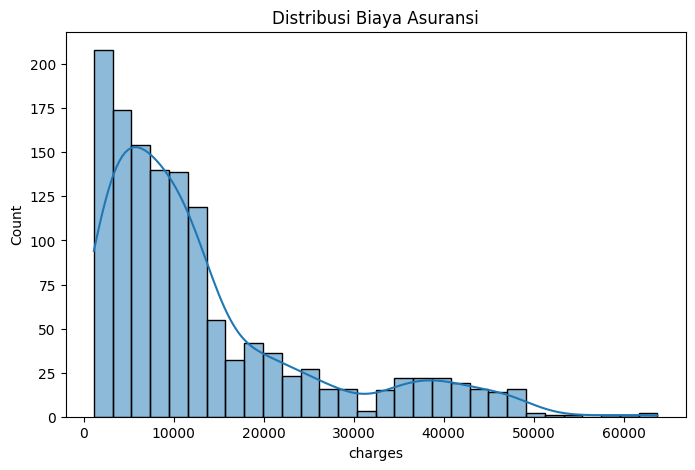

In [ ]:
# Distribusi biaya asuransi
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribusi Biaya Asuransi")
plt.show()

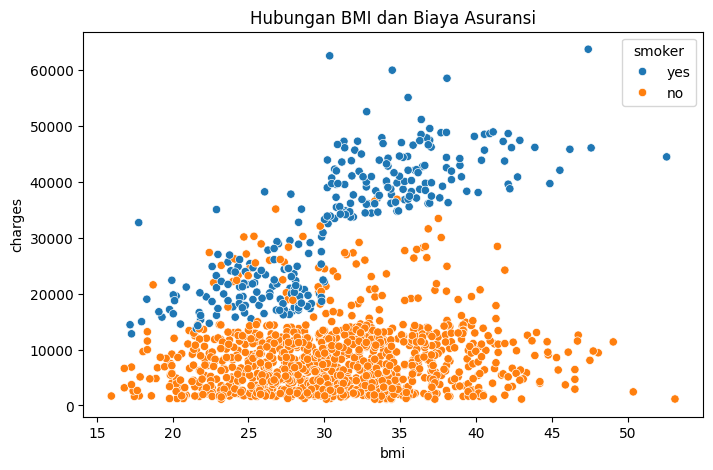

In [ ]:
# Hubungan BMI vs biaya
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Hubungan BMI dan Biaya Asuransi")
plt.show()

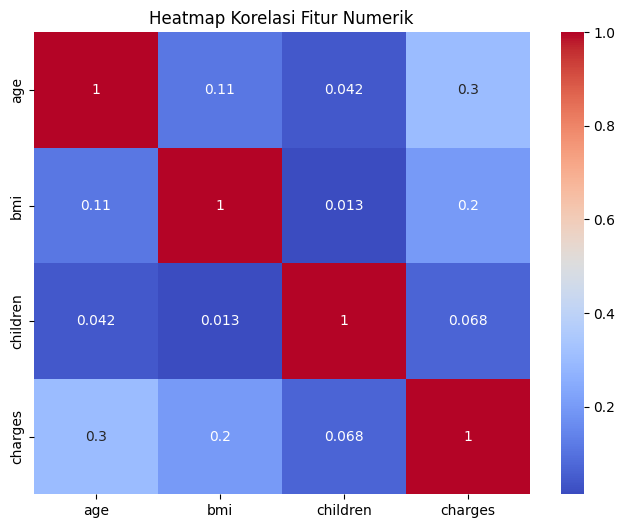

In [ ]:
# Korelasi Fitur Numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [ ]:
# Mengubah data kategorik menjadi numerik
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


**Seleksi Fitur**

In [ ]:
# Pemisahan Fitur Dan Target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split Data Train dan Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**Modeling (Linear Regression)**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Prediction**

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

**Evaluasi Metrik**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 4181.194473753652
Root Mean Squared Error (RMSE): 5796.284659276275
R2 Score: 0.7835929767120722


**Visualisasi Prediksi vs Aktual**

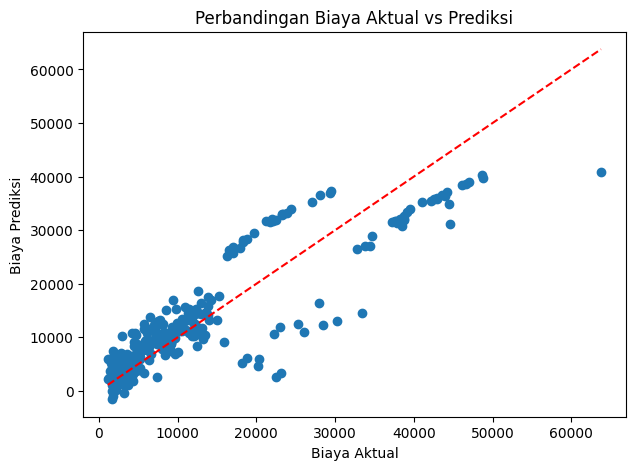

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red')
plt.xlabel("Biaya Aktual")
plt.ylabel("Biaya Prediksi")
plt.title("Perbandingan Biaya Aktual vs Prediksi")
plt.show()

**Simpan Model**

In [ ]:
import joblib
joblib.dump(model, "model_linear_regression_asuransi.pkl")

['model_linear_regression_asuransi.pkl']